---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 6

---
Please write your full name here
- **Name** : "Ehab Kamal Soliman"

# Part 1 PCA

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
%matplotlib inline


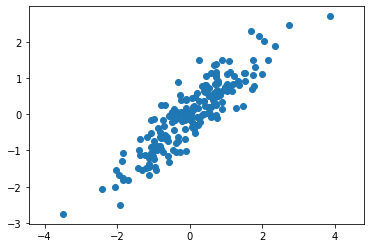

In [2]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [3]:
#### YOUR FUNCTION
def pca(X):
    
    # Check if the data is a NumPy array or Pandas DataFrame.
    if isinstance(X, np.ndarray):
        pass
    elif isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Center the data by subtracting the mean of each column.
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_centered =  (X - mean) / std

    # Compute the covariance matrix of the centered data.
    cov = np.cov(X_centered.T)

    # Compute the eigenvalues and eigenvectors of the covariance matrix.
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    # get sorted indicies
    indices = eigenvalues.argsort()

    # sort the eigenvalues
    sorted_eigenvalues = eigenvalues[indices]
    
    # Sort the eigenvectors by their eigenvalues.
    sorted_eigenvectors = eigenvectors[:, indices]
    
    # compute X_transformed
    X_transformed = X_centered @ eigenvectors
        
    return sorted_eigenvectors, sorted_eigenvalues , X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [4]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X) 

In [5]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [0.1076086  1.90244165]


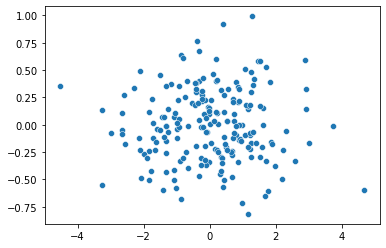

In [6]:
### Plot transformed data
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1]);

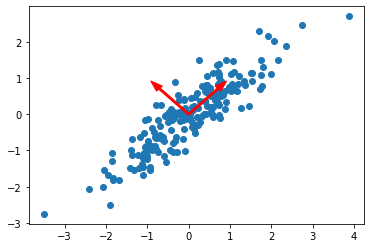

In [7]:
### Plot eigenvectors over ORIGINAL data
plt.scatter(X[:, 0], X[:, 1])
plt.arrow(0,0,sorted_eigenvectors[0, 0], sorted_eigenvectors[1, 0], color='red', width=0.05, head_width=0.2)
plt.arrow(0,0,sorted_eigenvectors[0, 1], sorted_eigenvectors[1, 1], color='red', width=0.05, head_width=0.2);

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print("Eigenvalues are: ", pca.explained_variance_)


Eigenvalues are:  [1.82927343 0.10246373]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [9]:
pca = PCA(n_components=1)
X_transformed_sklearn = pca.fit_transform(X)

print(f"shape of transformed data: {X_transformed_sklearn.shape}")

shape of transformed data: (200, 1)


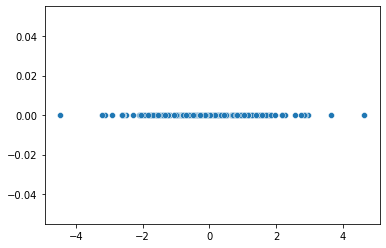

In [10]:
# plotting the transformed data
sns.scatterplot(x=X_transformed_sklearn.flatten(), y=np.zeros(X_transformed_sklearn.shape).flatten());

# Part 2 SVM

### Use the following function to plot the classification regions

In [11]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

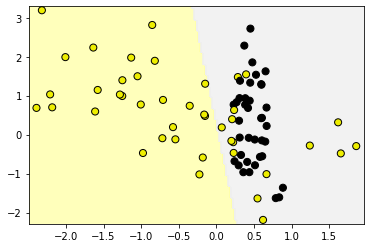

In [14]:
from sklearn.svm import SVC

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

plot_class_regions_for_classifier(clf, X_train, y_train)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

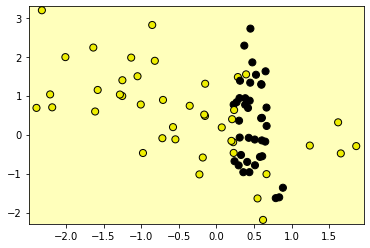

In [15]:
clf_1 = SVC(kernel="linear",C=0.00002)
clf_1.fit(X_train,y_train)

plot_class_regions_for_classifier(clf_1, X_train, y_train)

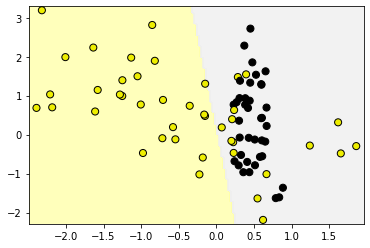

In [16]:
clf_2 = SVC(kernel="linear",C=200)
clf_2.fit(X_train, y_train)

plot_class_regions_for_classifier(clf_2, X_train, y_train)

According to scikit-learn documentation, C is the regularization parameter. The strength of the regularization is inversely proportional to C. So, in case of very small value of C is regularization was strong that the resulted model wanted to include everypoint in the first class.

### Use the fruits dataset in questions 4, 5, 6.

In [17]:
import pandas as pd
fruits = pd.read_table("Ehab Kamal - fruit_data_with_colors.txt")
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [18]:
fruits["fruit_label"].unique()

array([1, 2, 3, 4], dtype=int64)

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [19]:
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits["fruit_label"]

In [20]:
X_fruits_new = X_fruits[["width","height"]]

X_train, X_test, y_train, y_test = train_test_split(X_fruits_new, y_fruits, test_size=0.2, random_state=42)

In [21]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC(C=10, random_state=42)
svc_clf.fit(X_train, y_train)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=42)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

### Answer:
- LinearSVC uses the one-vs-rest approach to multiclass classification, which means that it trains one binary classifier for each class. So, in the case of 4 classes, there will be 4 binary classifiers trained.

In [22]:
svc_clf.coef_

array([[ 0.76048347, -0.22459715],
       [ 1.18717003, -1.70338354],
       [ 0.3183943 , -0.0062549 ],
       [-1.71656282,  1.14746624]])

In [23]:
svc_clf.intercept_

array([-3.42751628,  1.46849592, -3.01719598,  1.66954999])

#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


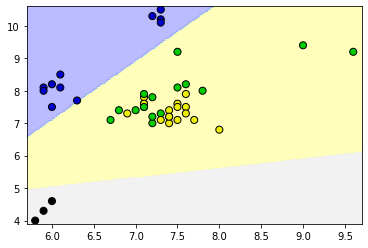

In [24]:
plot_class_regions_for_classifier(svc_clf, X_train.to_numpy(), y_train.to_numpy())

In [25]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [26]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)


parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}

model = GridSearchCV(SVC(), parameters, cv=5, verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'kernel': ('poly', 'rbf')},
             verbose=1)

In [27]:
model.best_params_

{'C': 10, 'kernel': 'poly'}

#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [28]:
print('Accuracy of SVC on training set: {:.2f}'
     .format(model.best_estimator_.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(model.best_estimator_.score(X_test, y_test)))

Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.93


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [29]:
breast_cancer = load_breast_cancer()

In [30]:
df_cancer = pd.DataFrame(X_cancer, columns=breast_cancer.feature_names)
df_cancer["labels"] = y_cancer
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


mean features are the most important so i will ignore other features to reduce dimensionality

In [31]:
mean_features= list(df_cancer.columns[:10])

In [32]:
df_cancer_mean = df_cancer[mean_features+["labels"]]

In [33]:
X = df_cancer_mean.drop(columns="labels")
y = df_cancer_mean["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
# apply standardscalar to standardize the data
model = make_pipeline(StandardScaler(), SVC(C=10, kernel="poly", random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, kernel='poly', random_state=42))])

In [36]:
print('Accuracy of SVC on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of SVC on training set: 0.93
Accuracy of SVC on test set: 0.92
